# Canada Marriage project

## 01-Cleaning and checking data

In [1]:
#Importing what I need for the dataset : numpy, pandas and matplotlib.pyplot,re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re as re

In [2]:
#Read data file : df=pd.read_csv("_filename_at_same_location_.csv")
df=pd.read_csv("00-Uncleaned Dataset - 39100052 python.csv")

#Check results at tail end : .tail(number of rows)
print(df.tail(2))

#Check results at front end : .head(number of rows)
print(df.head(2))

      REF_DATE      GEO        DGUID Sex or Gender               Indicator  \
8158      2020  Nunavut  2016A000262       Females    Mean age at marriage   
8159      2020  Nunavut  2016A000262       Females  Median age at marriage   

        UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID       VECTOR COORDINATE  VALUE  \
8158  Years     308         units          0  v1331244512     15.3.3    NaN   
8159  Years     308         units          0  v1331244513     15.3.4    NaN   

     STATUS  SYMBOL TERMINATED  DECIMALS  
8158      x     NaN        NaN         1  
8159      x     NaN        NaN         1  
   REF_DATE     GEO           DGUID Sex or Gender              Indicator  \
0      1970  Canada  2016A000011124    Both sexes    Mean age at divorce   
1      1970  Canada  2016A000011124    Both sexes  Median age at divorce   

     UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID       VECTOR COORDINATE  VALUE  \
0  Years     308         units          0  v1331244494      1.1.1   38.8   
1  Years     308 

In [3]:
#Check columns names : .columns
print(df.columns)

Index(['REF_DATE', 'GEO', 'DGUID', 'Sex or Gender', 'Indicator', 'UOM',
       'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE',
       'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')


In [4]:
#check none/missing values: ds.isna().sum()
#all the values are replaced with a Boolean value True for NA (not-a -number) values, and otherwise False
#if there is number, it means missing values
df.isna().sum()

REF_DATE            0
GEO                 0
DGUID               0
Sex or Gender       0
Indicator           0
UOM                 0
UOM_ID              0
SCALAR_FACTOR       0
SCALAR_ID           0
VECTOR              0
COORDINATE          0
VALUE             106
STATUS           8054
SYMBOL           8160
TERMINATED       7800
DECIMALS            0
dtype: int64

In [5]:
#check the data type(strings or numbers) in the column : .dtypes
df.dtypes

REF_DATE           int64
GEO               object
DGUID             object
Sex or Gender     object
Indicator         object
UOM               object
UOM_ID             int64
SCALAR_FACTOR     object
SCALAR_ID          int64
VECTOR            object
COORDINATE        object
VALUE            float64
STATUS            object
SYMBOL           float64
TERMINATED        object
DECIMALS           int64
dtype: object

In [6]:
#check duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8155    False
8156    False
8157    False
8158    False
8159    False
Length: 8160, dtype: bool

In [7]:
#check unique words in indicator before applying filter :
#https://stackoverflow.com/questions/18936957/count-distinct-words-from-a-pandas-data-frame

results=set()
df['Indicator'].str.lower().str.split().apply(results.update)
print(results)

{'median', 'marriage', 'age', 'at', 'divorce', 'mean'}


In [8]:
#check unique sentences in indicator before applying filter : 
#https://www.w3resource.com/python-exercises/pandas/string/python-pandas-string-exercise-39.php

def find_unique_sentence(str1):
    result = re.findall(r'(?sm)(^[^\r\n]+$)(?!.*^\1$)', str1)
    return result

df['unique_sentence']=df['Indicator'].apply(lambda st : find_unique_sentence(st))
print("\nExtract unique sentences :")
print(df)


Extract unique sentences :
      REF_DATE      GEO           DGUID Sex or Gender               Indicator  \
0         1970   Canada  2016A000011124    Both sexes     Mean age at divorce   
1         1970   Canada  2016A000011124    Both sexes   Median age at divorce   
2         1970   Canada  2016A000011124    Both sexes    Mean age at marriage   
3         1970   Canada  2016A000011124    Both sexes  Median age at marriage   
4         1970   Canada  2016A000011124         Males     Mean age at divorce   
...        ...      ...             ...           ...                     ...   
8155      2020  Nunavut     2016A000262         Males  Median age at marriage   
8156      2020  Nunavut     2016A000262       Females     Mean age at divorce   
8157      2020  Nunavut     2016A000262       Females   Median age at divorce   
8158      2020  Nunavut     2016A000262       Females    Mean age at marriage   
8159      2020  Nunavut     2016A000262       Females  Median age at marriage   


In [9]:
#check unique sentences part 2 : https://www.pythonpool.com/python-count-unique-values-in-list/
unique_sentences=np.unique(df['unique_sentence'])
print(unique_sentences)

#To counter check with indicators to see if it totally matches
unique_sentences_indicator=np.unique(df["Indicator"])
print(unique_sentences_indicator)

[list(['Mean age at divorce']) list(['Mean age at marriage'])
 list(['Median age at divorce']) list(['Median age at marriage'])]
['Mean age at divorce' 'Mean age at marriage' 'Median age at divorce'
 'Median age at marriage']


In [10]:
#Show only revelent columns : ds_subset=ds[["columns name1","column name2",etc]]
df_subset=df[["REF_DATE","GEO","Indicator","VALUE"]]

#Print results
print(df_subset)

      REF_DATE      GEO               Indicator  VALUE
0         1970   Canada     Mean age at divorce   38.8
1         1970   Canada   Median age at divorce   37.1
2         1970   Canada    Mean age at marriage   23.6
3         1970   Canada  Median age at marriage   22.0
4         1970   Canada     Mean age at divorce   40.3
...        ...      ...                     ...    ...
8155      2020  Nunavut  Median age at marriage    NaN
8156      2020  Nunavut     Mean age at divorce    NaN
8157      2020  Nunavut   Median age at divorce    NaN
8158      2020  Nunavut    Mean age at marriage    NaN
8159      2020  Nunavut  Median age at marriage    NaN

[8160 rows x 4 columns]


In [11]:
#Filter required data in 1 specific column : 
#b=a[(a["Column name"]=='words to filter1')|(a["Column name"]=='words to filter2')]

df_median_marriage=df_subset[(df_subset['Indicator']=='Median age at marriage')]

#Check results
print(df_median_marriage)

      REF_DATE                        GEO               Indicator  VALUE
3         1970                     Canada  Median age at marriage   22.0
7         1970                     Canada  Median age at marriage   23.3
11        1970                     Canada  Median age at marriage   20.5
15        1970  Newfoundland and Labrador  Median age at marriage   21.7
19        1970  Newfoundland and Labrador  Median age at marriage   22.6
...        ...                        ...                     ...    ...
8143      2020      Northwest Territories  Median age at marriage   27.7
8147      2020      Northwest Territories  Median age at marriage   27.0
8151      2020                    Nunavut  Median age at marriage    NaN
8155      2020                    Nunavut  Median age at marriage    NaN
8159      2020                    Nunavut  Median age at marriage    NaN

[2040 rows x 4 columns]


In [12]:
#Count total missing values in column "VALUE"
#https://www.pythonpool.com/python-count-unique-values-in-list/
df_median_marriage["VALUE"].isnull().sum()

25

In [13]:
#Find missing values in which rows
#https://www.youtube.com/watch?v=RI7WaQCzaUM at 1:15
df_median_marriage[df_median_marriage.isnull().values.any(1)]

,REF_DATE,GEO,Indicator,VALUE
4843,2000,Nunavut,Median age at marriage,NaN
4847,2000,Nunavut,Median age at marriage,NaN
5011,2001,Nunavut,Median age at marriage,NaN
5015,2001,Nunavut,Median age at marriage,NaN
5179,2002,Nunavut,Median age at marriage,NaN
5183,2002,Nunavut,Median age at marriage,NaN
5347,2003,Nunavut,Median age at marriage,NaN
5351,2003,Nunavut,Median age at marriage,NaN
6523,2010,Nunavut,Median age at marriage,NaN
6527,2010,Nunavut,Median age at marriage,NaN


In [14]:
#check unique words in geo:
#https://stackoverflow.com/questions/18936957/count-distinct-words-from-a-pandas-data-frame

unique_sentences_geo=np.unique(df["GEO"])
print(unique_sentences_geo)

['Alberta' 'British Columbia' 'Canada' 'Manitoba' 'New Brunswick'
 'Newfoundland and Labrador' 'Northwest Territories'
 'Northwest Territories including Nunavut' 'Nova Scotia' 'Nunavut'
 'Ontario' 'Prince Edward Island' 'Quebec' 'Saskatchewan' 'Yukon']


In [15]:
#remove missing values by rows : .dropna()
#https://www.w3schools.com/python/pandas/ref_df_drop.asp
#https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php
df_median_marriage.dropna()

,REF_DATE,GEO,Indicator,VALUE
3,1970,Canada,Median age at marriage,22.0
7,1970,Canada,Median age at marriage,23.3
11,1970,Canada,Median age at marriage,20.5
15,1970,Newfoundland and Labrador,Median age at marriage,21.7
19,1970,Newfoundland and Labrador,Median age at marriage,22.6
...,...,...,...,...
8131,2020,Yukon,Median age at marriage,30.4
8135,2020,Yukon,Median age at marriage,28.1
8139,2020,Northwest Territories,Median age at marriage,27.3
8143,2020,Northwest Territories,Median age at marriage,27.7


In [16]:
#check removed results
unique_sentences_geo1=np.unique(df_median_marriage["GEO"])
print(unique_sentences_geo1)

['Alberta' 'British Columbia' 'Canada' 'Manitoba' 'New Brunswick'
 'Newfoundland and Labrador' 'Northwest Territories'
 'Northwest Territories including Nunavut' 'Nova Scotia' 'Nunavut'
 'Ontario' 'Prince Edward Island' 'Quebec' 'Saskatchewan' 'Yukon']


In [23]:
#filter out Northwest Territories including Nunavut and canada
new_df_median_marriage=df_median_marriage[(df_median_marriage['GEO']!='Canada')]
print(new_df_median_marriage)
new_df_median_marriage=new_df_median_marriage[(new_df_median_marriage['GEO']!='Northwest Territories including Nunavut')]
print(new_df_median_marriage)

      REF_DATE                        GEO               Indicator  VALUE
15        1970  Newfoundland and Labrador  Median age at marriage   21.7
19        1970  Newfoundland and Labrador  Median age at marriage   22.6
23        1970  Newfoundland and Labrador  Median age at marriage   20.2
27        1970       Prince Edward Island  Median age at marriage   21.2
31        1970       Prince Edward Island  Median age at marriage   22.4
...        ...                        ...                     ...    ...
8143      2020      Northwest Territories  Median age at marriage   27.7
8147      2020      Northwest Territories  Median age at marriage   27.0
8151      2020                    Nunavut  Median age at marriage    NaN
8155      2020                    Nunavut  Median age at marriage    NaN
8159      2020                    Nunavut  Median age at marriage    NaN

[1893 rows x 4 columns]
      REF_DATE                        GEO               Indicator  VALUE
15        1970  Newfoundla

In [24]:
#check removed results
unique_sentences_geo2=np.unique(new_df_median_marriage["GEO"])
print(unique_sentences_geo2)

['Alberta' 'British Columbia' 'Manitoba' 'New Brunswick'
 'Newfoundland and Labrador' 'Northwest Territories' 'Nova Scotia'
 'Nunavut' 'Ontario' 'Prince Edward Island' 'Quebec' 'Saskatchewan'
 'Yukon']


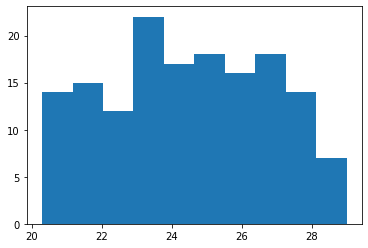

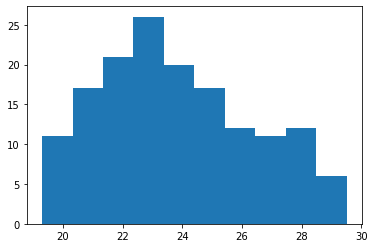

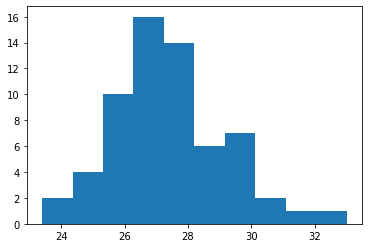

In [46]:
#Checking the distribution of the 3 dataset at random

h_albe=new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="Alberta","VALUE"]
plt.hist(h_albe)
plt.show()

h_peis=new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="Prince Edward Island","VALUE"]
plt.hist(h_peis)
plt.show()

h_nter=new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="Northwest Territories","VALUE"]
plt.hist(h_nter)
plt.show()

In [45]:
#By random sample, we can see that the distribution is slightly right-skewed. 
#Therefore, median is used to calculate the dataset.

med_albe=int(new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="Alberta","VALUE"].median())
print(med_albe)

med_bcol=int(new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="British Columbia","VALUE"].median())
print(med_bcol)

med_nbru=int(new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="New Brunswick","VALUE"].median())
print(med_nbru)

med_nlab=int(new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="Newfoundland and Labrador","VALUE"].median())
print(med_nlab)

med_nter=int(new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="Northwest Territories","VALUE"].median())
print(med_nter)

med_mani=int(new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="Manitoba","VALUE"].median())
print(med_mani)

med_nsco=int(new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="Nova Scotia","VALUE"].median())
print(med_nsco)

med_nuna=int(new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="Nunavut","VALUE"].median())
print(med_nuna)

med_onta=int(new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="Ontario","VALUE"].median())
print(med_onta)

med_peis=int(new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="Prince Edward Island","VALUE"].median())
print(med_peis)

med_queb=int(new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="Quebec","VALUE"].median())
print(med_queb)

med_sask=int(new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="Saskatchewan","VALUE"].median())
print(med_sask)

med_yuko=int(new_df_median_marriage.loc[new_df_median_marriage["GEO"]=="Yukon","VALUE"].median())
print(med_yuko)

24
25
23
23
27
24
23
27
24
23
24
23
25


In [49]:
#Store values in dict
final_results={
    "Alberta" : med_albe,
    "British Columbia": med_bcol,
    "New Brunswick": med_nbru,
    "Newfoundland and Labrador": med_nlab,
    "Northwest Territories": med_nter,
    "Manitoba": med_mani,
    "Nova Scotia": med_nsco,
    "Nunavut": med_nuna,
    "Ontario": med_onta,
    "Prince Edward Island": med_peis,
    "Quebec": med_queb,
    "Saskatchewan": med_sask,
    "Yukon": med_yuko
}
print(final_results)

{'Alberta': 24, 'British Columbia': 25, 'New Brunswick': 23, 'Newfoundland and Labrador': 23, 'Northwest Territories': 27, 'Manitoba': 24, 'Nova Scotia': 23, 'Nunavut': 27, 'Ontario': 24, 'Prince Edward Island': 23, 'Quebec': 24, 'Saskatchewan': 23, 'Yukon': 25}


In [53]:
#Save to csv file format
#formula - variable.to_csv("name of file.csv", index=False-to remove index in file)
df.to_csv("Project documentation.csv",index=False)

In [63]:
#export final_results to csv format 
#https://stackoverflow.com/questions/28555112/export-a-simple-dictionary-into-excel-file-in-python
#https://www.geeksforgeeks.org/pandas-dataframe-t-function-in-python/

df_end_results = pd.DataFrame(data=final_results, index=["Median age at Marriage"])

#Transpose the results so that key value will be display at the left and values at the right
df_end_results = (df_end_results.T)

#check results before saving
print (df_end_results)

#saving to csv files
df_end_results.to_csv('end_results.csv')

                           Median age at Marriage
Alberta                                        24
British Columbia                               25
New Brunswick                                  23
Newfoundland and Labrador                      23
Northwest Territories                          27
Manitoba                                       24
Nova Scotia                                    23
Nunavut                                        27
Ontario                                        24
Prince Edward Island                           23
Quebec                                         24
Saskatchewan                                   23
Yukon                                          25
